In [33]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

In [15]:
data = load_wine()

In [16]:
data.feature_names , data.target_names

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'))

In [17]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [18]:
X = pd.DataFrame(data = data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [19]:
X.shape, y.shape

((178, 13), (178,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

In [21]:
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('gnb',GaussianNB())
])

In [22]:
param_grid = {
     'gnb__var_smoothing': np.logspace(-9, -6, 10)
}

In [23]:
grid_search = GridSearchCV(pipeline, param_grid, cv = 5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train,y_train)

,estimator,Pipeline(step...aussianNB())])
,param_grid,{'gnb__var_smoothing': array([1.0000...00000000e-06])}
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [25]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

Best Parameters: {'gnb__var_smoothing': 1e-09}
Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



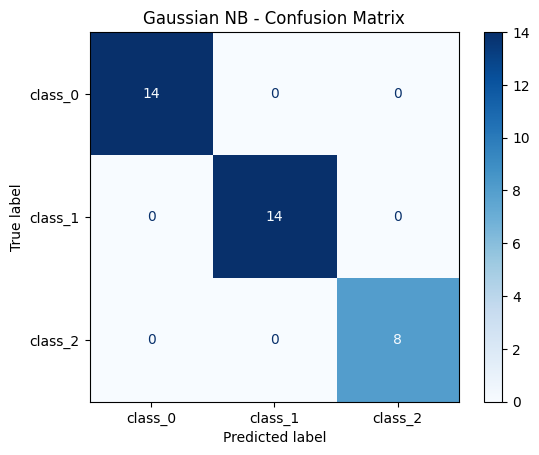

In [34]:
print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7️⃣ Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Gaussian NB - Confusion Matrix")
plt.show()